<b><div style="text-align: center;">Финальный проект: Мобильные приложения — Выделение групп пользователей на основе поведения</div></b>

<b><div style="text-align: center;">Описание проекта</div></b><br>
Как начинаещему аналитику приложения «Ненужные вещи» мне предстоит проанализировать действия пользователей в приложении, чтобы помочь ему стать лучшим приложением для продажи ненужных вещей.<br>
    <b><div style="text-align: center;">Задачи</div></b><br>
- **Выделить группы пользователей, которые различаются по метрикам:**
1. retention rate,
2. время, проведённое в приложении, 
3. частота действий, 
4. конверсия в целевое действие — просмотр контактов.
- **Провести исследовательский анализ данных**
- **Сегментировать пользователей на основе действий**
- **Проверить статистические гипотезы**
1. *Некоторые пользователи установили приложение по ссылке из `yandex`, другие — из `google`. Проверьте гипотезу: две эти группы демонстрируют разную конверсию в просмотры контактов.*
2. *Некоторые пользователи просматривают фотографии, другие не просматривают. Проверить гипотезу: две эти группы демонстрируют разную конверсию в просмотры контактов.*

По итогам исследования подготовить презентацию. Для создания презентации использовать любой удобный инструмент, и отправить презентацию нужно обязательно в формате pdf, прикрепив ссылку на файл в основном проекте.

<b><div style="text-align: center;">Описание данных:</div></b>

Датасет содержит данные о событиях, совершенных в мобильном приложении "Ненужные вещи". В нем пользователи продают свои ненужные вещи, размещая их на доске объявлений.

В датасете содержатся данные пользователей, впервые совершивших действия в приложении после 7 октября 2019 года.

Датасет **mobile_dataset.csv** содержит колонки:<br>
`event.time` — время совершения<br>
`event.name` — название события<br>
`user.id` — идентификатор пользователя<br>

Датасет **mobile_sources.csv** содержит колонки:<br>
`userId` — идентификатор пользователя<br>
`source` — источник, с которого пользователь установил приложение<br>

Расшифровки событий:<br>
`advert_open` — открытие карточки объявления<br>
`photos_show` — просмотр фотографий в объявлении<br>
`tips_show` — пользователь увидел рекомендованные объявления<br>
`tips_click` — пользователь кликнул по рекомендованному объявлению<br>
`contacts_show` и `show_contacts` — пользователь нажал на кнопку "посмотреть номер телефона" на карточке объявления<br>
`contacts_call` — пользователь позвонил по номеру телефона на карточке объявления<br>
`map` — пользователь открыл карту размещенных объявлений<br>
`search_1` — `search_7` — разные события, связанные с поиском по сайту<br>
`favorites_add` — добавление объявления в избранное<br>

<div style="text-align: center;"><b>Декомпозиция</b></div><br>

1. Загрузка библиотек и чтение файлов данных<br>
2. Предобработка данных
  - Исследовать общую информацию о данных;
  - Исследовать пропущенные значения и при необходимости провести работу с пропусками в данных;
  - Проверить корректность наименований колонок и переименовать колонки в случае необходимости;
  - Исследовать соответствие типов и привести типы при их несоответстиви;
  - Исследовать дубликаты и удалить дубликаты при наличии
<br> 
3. Исследовательский анализ данных<br>
  - retention rate,
  - время, проведённое в приложении, 
  - частота действий, 
  - конверсия в целевое действие — просмотр контактов.
4. Сегментировать пользователей на основе действий<br>
  - обосновать выбор сегментов
  - поверить retetion rate и конверсию для каждой группы
5. Выводы и ответы на основные вопросы исследования<br>
6. Проверить статистические гипотезы<br>
 - Некоторые пользователи установили приложение по ссылке из `yandex`, другие — из `google`. Проверить гипотезу: две эти группы демонстрируют разную конверсию в просмотры контактов.
 - Некоторые пользователи просматривают фотографии, другие не просматривают. Проверить гипотезу: две эти группы демонстрируют разную конверсию в просмотры контактов. 
 <br>
6. Презентация<br>

## Загрузка библиотек и чтение данных

Загружаем библиотеки

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import math as mth
import warnings
warnings.filterwarnings('ignore')

Загружаем данные

In [2]:
    users = pd.read_csv('/datasets/mobile_dataset.csv')
    sources = pd.read_csv('/datasets/mobile_soures.csv')

На этом шаге были загружены библиотеки, необходимые для работы и прочитаны файлы с данными для анализа. Далее выполним предобработку данных

## Предобработка данных

### Исследовать общую информацию о данных

In [3]:
users.head(5)

,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [5]:
sources.head(5)

,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


In [6]:
sources.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


### Исследовать пропущенные значения и провести работу с пропусками при необходимости

В датасете users cодержится 74197 не пустых записей. В датасете sources содержится 4293 записи, пропусков нет.

### Проверить корректность наименований колонок и переименовать колонки в случае необходимости

In [7]:
users.columns =['event_time', 'event_name', 'user_id']
sources.columns =['user_id', 'source']

### Исследовать соответствие типов

В датасете users колонка event_time имеет неверный тип данных, приведем ее к типу datetime. Тавже выделим дату в отдельный столбец.

In [8]:
users['event_time'] = pd.to_datetime(users['event_time'], format='%Y-%m-%d %H:%M:%S')

Добавим отдельный столбец для даты

In [9]:
users['event_date'] = users['event_time'].astype('datetime64[D]')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_time  74197 non-null  datetime64[ns]
 1   event_name  74197 non-null  object        
 2   user_id     74197 non-null  object        
 3   event_date  74197 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 2.3+ MB


### Исследовать дубликаты и удалить дубликаты при наличии

In [10]:
users.duplicated().sum()

0

In [11]:
sources.duplicated().sum()  

0

In [12]:
print('Число пользователдей в users:',users['user_id'].nunique())
print('число пользователдей в sources:', sources['user_id'].nunique())

Число пользователдей в users: 4293
число пользователдей в sources: 4293


Дубликатов в файлов не обнаружено, число пользоватлей в обоих файлах совпадает. Для удобстава дальнешего анализа, соединим 2 файла в один датафрейм

In [13]:
df=users.merge(sources, on='user_id', how='left')

In [14]:
df.head(5)

,event_time,event_name,user_id,event_date,source
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,other
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,other
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2019-10-07,yandex
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,other
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2019-10-07,yandex


In [15]:
print('min вермя события', min(df['event_time']))
print('max вермя события', max(df['event_time']))

min вермя события 2019-10-07 00:00:00.431357
max вермя события 2019-11-03 23:58:12.532487


В датасете данные за период с 2019-10-07 00:00:00 по 2019-11-03 23:58:12

In [16]:
df['event_name'].unique()

array(['advert_open', 'tips_show', 'map', 'contacts_show', 'search_4',
       'search_5', 'tips_click', 'photos_show', 'search_1', 'search_2',
       'search_3', 'favorites_add', 'contacts_call', 'search_6',
       'search_7', 'show_contacts'], dtype=object)

Найден неявный дубликат contacts_show и show_contacts

In [17]:
df.loc[ df['event_name'] == 'show_contacts', 'event_name'] = 'contacts_show'

Также среди событий присутствует 7 разных видов поиска. При анализе нам не важно что это был за поиск, поэтому объединим их в одно событие search

In [18]:
def search(x):
    if 'search' in x:
        name = 'search'
        return name
    return x

df['event_name'] = df['event_name'].apply(search)

In [19]:
df['source'].unique()

array(['other', 'yandex', 'google'], dtype=object)

Типы значений источников соответствуют описанию данных, ошибок нет.

* На этом шаге были проанализированы данные. В датасете данные за период с с 2019-10-07 00:00:00 по 2019-11-03 23:58:12
* Изменены названия столбцов. 
* Столбец event_time был приведен к типу Datetime и был добавлен столбец даты. 
* Полных дубликатов не обнаружено. 
* Неявные дубликаты событий contacts_show и show_contacts были приведены к значению contacts_show.<br>
* Семь разных видов поиска были заменены общим названием search
Далее проведем исследовательский анализ данных


## Исследовательский анализ данных

### Retention rate

Retention Rate, или коэффициент удержания, показывает, как долго клиенты остаются с компанией. Чтобы узнать Retention Rate, нужно разделить количество активных пользователей на текущий период на количество активных пользователей на начальном этапе. В качестве периода выберем неделю.
Получим первый день активности пользователя и добавим полученную колонку в исходный датасет.

In [20]:
first_date = df.groupby(['user_id'])['event_date'].min()
first_date.name='first_act'
df=df.merge(first_date, on='user_id', how='left')
df

,event_time,event_name,user_id,event_date,source,first_act
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,other,2019-10-07
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,other,2019-10-07
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2019-10-07,yandex,2019-10-07
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,other,2019-10-07
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2019-10-07,yandex,2019-10-07
...,...,...,...,...,...,...
74192,2019-11-03 23:53:29.534986,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,2019-11-03,google,2019-10-16
74193,2019-11-03 23:54:00.407086,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,2019-11-03,google,2019-10-16
74194,2019-11-03 23:56:57.041825,search,20850c8f-4135-4059-b13b-198d3ac59902,2019-11-03,google,2019-10-27
74195,2019-11-03 23:57:06.232189,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,2019-11-03,google,2019-10-16


Выделим когорты на основе первой недели активности

In [21]:
df['act_week'] = pd.to_datetime(df['event_date'],unit='d') - pd.to_timedelta(df['event_date'].dt.dayofweek, unit='d')
df['cohort'] = pd.to_datetime(df['first_act'],unit='d') - pd.to_timedelta(df['first_act'].dt.dayofweek, unit='d')

Рассчитаем lifetime

In [22]:
df['lifetime'] = df['act_week'] - df['cohort']
df['lifetime'] = df['lifetime'] / np.timedelta64(1,'W')
df['lifetime'] = df['lifetime'].astype(int)

Сгруппируем данные по когорте и lifetime

In [23]:
cohort = df.groupby(['cohort','lifetime']).agg({'user_id':'nunique'}).reset_index()
cohort= cohort.rename(columns={'user_id':'act_users'})

Определим число пользователей в 0 неделю

In [24]:
week0 = cohort[cohort['lifetime'] == 0][['cohort','act_users']]
week0 = week0.rename(columns={'act_users':'all_users'})
cohort = cohort.merge(week0,on='cohort')

In [25]:
cohort['retention'] = cohort['act_users']/cohort['all_users']
cohort['cohort'] = cohort['cohort'].dt.date

Построим график удержания пользователей

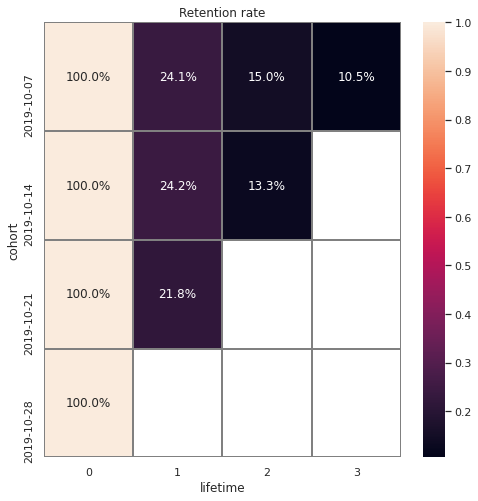

In [26]:
retention = cohort.pivot_table(index='cohort',columns='lifetime',values='retention',aggfunc='sum')
sns.set(style='white')
plt.figure(figsize=(8, 8))
plt.title('Retention rate')
sns.heatmap(retention, annot=True, fmt='.1%', linewidths=1, linecolor='gray');
plt.show()

Из графика видим, что Retention Rate у пользователей, пришедших с 21 октября по 27 октября коэффициент 21.8%, а у пользователей с 07 октября по 13 октября этот показатель 24.1%. Максимальный показатель у пользователей с 14 октября по 20 октября 24.2%. Также при увеличении lifetime снижается число пользователей приложения.

### Время, проведённое в приложении

Время, проведённое в приложении является важной метрикой, определить его поможет пользовательская сессия — набор действий пользователя, выполняемый от открытия приложения до окончания его использования. В исходных данных отсутствуют сессии пользователей, поэтому посчитаем длительность сессии как разницу мин и мах значений времени в секундах, в рамках одного дня. Также переведем полученное значение в минуты, для наглядности графика.

Подготовим таблицу сессий

In [27]:
session_max = df.groupby(['user_id', 'event_date'])['event_time'].agg('max').reset_index()\
.rename(columns = {'event_time':'event_time_max'})
session_min = df.groupby(['user_id', 'event_date'])['event_time'].agg('min').reset_index()\
.rename(columns = {'event_time':'event_time_min'})
sessions = session_max.merge(session_min, on = ['user_id', 'event_date'], how = 'left')
sessions['duration_sec'] = (sessions['event_time_max'] - sessions['event_time_min']).dt.seconds
sessions['duration_min']=round(sessions['duration_sec']/60,2)

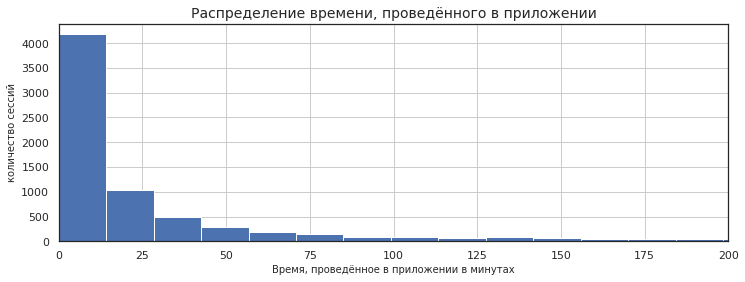

count    7817.000000
mean       83.026195
std       190.167616
min         0.000000
25%         2.450000
50%        11.800000
75%        48.730000
max      1417.470000
Name: duration_min, dtype: float64

In [28]:
plt.figure(figsize=(12, 4))
sessions['duration_min'].hist(bins=100)
plt.title('Распределение времени, проведённого в приложении', fontsize=14)
plt.ylabel('количество сессий', fontsize=10)
plt.xlabel('Время, проведённое в приложении в минутах', fontsize=10)
plt.xlim([0, 200])
plt.show()
sessions['duration_min'].describe()

Большая часть сеансов не превышает 12 минут

Проанализируем нулевые сессии

In [29]:
sessions[sessions['duration_min'] == 0]

,user_id,event_date,event_time_max,event_time_min,duration_sec,duration_min
9,00157779-810c-4498-9e05-a1e9e3cedf93,2019-11-03,2019-11-03 17:12:09.708771,2019-11-03 17:12:09.708771,0,0.0
19,00551e79-152e-4441-9cf7-565d7eb04090,2019-10-29,2019-10-29 02:17:12.342406,2019-10-29 02:17:12.342406,0,0.0
25,00753c79-ea81-4456-acd0-a47a23ca2fb9,2019-10-20,2019-10-20 14:57:06.080501,2019-10-20 14:57:06.080501,0,0.0
45,0164902d-7393-47e1-9d5b-0ec4c0171cdc,2019-10-26,2019-10-26 18:50:33.550603,2019-10-26 18:50:33.550603,0,0.0
56,01d283e1-cb1c-407a-a4e0-9f72f3deecca,2019-10-19,2019-10-19 05:27:22.021197,2019-10-19 05:27:22.021197,0,0.0
...,...,...,...,...,...,...
7768,fe585541-43a9-4d56-8466-718856a4d195,2019-10-15,2019-10-15 12:14:56.669265,2019-10-15 12:14:56.669265,0,0.0
7769,fe585541-43a9-4d56-8466-718856a4d195,2019-10-19,2019-10-19 00:13:20.533171,2019-10-19 00:13:20.533171,0,0.0
7773,fe898476-a038-4717-875d-b01e8cddf537,2019-10-19,2019-10-19 11:33:31.681982,2019-10-19 11:33:31.681982,0,0.0
7774,fe92fa6c-7eef-484f-b31b-fa0db4e4d895,2019-10-13,2019-10-13 18:02:11.003357,2019-10-13 18:02:11.003357,0,0.0


In [30]:
user0 =list(sessions[sessions['duration_min'] == 0].user_id)
dates0=list(sessions[sessions['duration_min'] == 0].event_date)
df.query('user_id in @user0 and event_date in @dates0')

,event_time,event_name,user_id,event_date,source,first_act,act_week,cohort,lifetime
107,2019-10-07 01:18:43.135736,tips_show,17f6b2db-2964-4d11-89d8-7e38d2cb4750,2019-10-07,yandex,2019-10-07,2019-10-07,2019-10-07,0
108,2019-10-07 01:19:27.203915,tips_show,17f6b2db-2964-4d11-89d8-7e38d2cb4750,2019-10-07,yandex,2019-10-07,2019-10-07,2019-10-07,0
109,2019-10-07 01:19:31.223825,tips_show,17f6b2db-2964-4d11-89d8-7e38d2cb4750,2019-10-07,yandex,2019-10-07,2019-10-07,2019-10-07,0
110,2019-10-07 01:20:23.127940,tips_show,17f6b2db-2964-4d11-89d8-7e38d2cb4750,2019-10-07,yandex,2019-10-07,2019-10-07,2019-10-07,0
111,2019-10-07 01:24:44.179768,tips_show,17f6b2db-2964-4d11-89d8-7e38d2cb4750,2019-10-07,yandex,2019-10-07,2019-10-07,2019-10-07,0
...,...,...,...,...,...,...,...,...,...
74077,2019-11-03 22:56:31.244687,photos_show,57930074-b0f6-4107-8836-8c973e3ca3ec,2019-11-03,yandex,2019-10-10,2019-10-28,2019-10-07,3
74100,2019-11-03 23:01:08.557298,photos_show,57930074-b0f6-4107-8836-8c973e3ca3ec,2019-11-03,yandex,2019-10-10,2019-10-28,2019-10-07,3
74129,2019-11-03 23:14:09.374539,map,ddc530dc-3ac2-4025-89ac-734e49a81828,2019-11-03,yandex,2019-10-12,2019-10-28,2019-10-07,3
74175,2019-11-03 23:46:10.196861,photos_show,d5e14ec3-7ae5-4598-ad36-f626b3ce24e3,2019-11-03,google,2019-10-28,2019-10-28,2019-10-28,0


Если проанализировать события по дате и пользователю, в нулевую сессию попадают разные события, поэтому однозначно сказать что это ошибочные данные нельзя. Возможно при наличии выделенных сессей в исходных данных таких сессий было бы меньше.<br>
Как вариант нулевая сессия при событии tips_show- это вылет приложения с ошибкой, но для полноты анализа не хватает информации о сессиях.

Проанализируем max сессии

In [31]:
sessions[sessions['duration_min'] ==sessions['duration_min'].max()]

,user_id,event_date,event_time_max,event_time_min,duration_sec,duration_min
660,12681fdf-d1d1-454b-9b92-e8a3ccfaf07b,2019-11-03,2019-11-03 23:47:35.841615,2019-11-03 00:10:07.175263,85048,1417.47


In [32]:
user_max=list(sessions[sessions['duration_min'] == sessions['duration_min'].max()]['user_id'])
user_max_date=list(sessions[sessions['duration_min'] == sessions['duration_min'].max()]['event_date'])
df.query('user_id==@user_max[0] and event_date==@user_max_date[0]')

,event_time,event_name,user_id,event_date,source,first_act,act_week,cohort,lifetime
71342,2019-11-03 00:10:07.175263,photos_show,12681fdf-d1d1-454b-9b92-e8a3ccfaf07b,2019-11-03,yandex,2019-11-02,2019-10-28,2019-10-28,0
72779,2019-11-03 16:54:45.124660,photos_show,12681fdf-d1d1-454b-9b92-e8a3ccfaf07b,2019-11-03,yandex,2019-11-02,2019-10-28,2019-10-28,0
74181,2019-11-03 23:47:35.841615,photos_show,12681fdf-d1d1-454b-9b92-e8a3ccfaf07b,2019-11-03,yandex,2019-11-02,2019-10-28,2019-10-28,0


В связи с отсутствием сессий в исходных данных, разбиение было проведено как разницу мин и мах значений времени в рамках одного дня. При наличии реальных исходных данных о сессиях, это скоре всего было 3 разных сессии, учитывая малое количесвто действий.

Рассмотрим количество сессий на пользователя:

In [33]:
sessions_count=sessions.groupby(['user_id'])['user_id'].agg('count')
sessions_count.describe()

count    4293.000000
mean        1.820871
std         1.762537
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        25.000000
Name: user_id, dtype: float64

Учитывая условный характер разбиения на сессии, эта величины мах 25 и среднее 1.82 лишь справочные.

Всего было 7817 сессий. Среди них 1019 нулевых сессий. На одного пользователся приходится в среднем чуть менее 2х сессий, мах 25 сессий.
Средняя продолжительность сессии 83 минуты.Большее число сессий не превышает 12 минут. Всего одна сессия с мах длительность сессии 1417 минут, в течении которой пользователь совершил 3 просмотра фото.

### Частота действий

Рассмотрим частоту действий на пользователя, а также частоту основных событий приложения

In [34]:
user_event = df.groupby(['event_date','user_id']).agg({'event_time':'count'}).reset_index()
user_event.columns = ['event_date', 'user_id', 'event_count']
user_event
all_event=df.groupby(['event_date']).agg({'event_time':'count'}).reset_index()
all_event.columns = ['event_date','all_event_count']
freq_event=user_event.merge(all_event, on = ['event_date'], how = 'left')
freq_event['frequancy']=freq_event['event_count']/freq_event['all_event_count']*100
freq_event.sort_values('frequancy')

,event_date,user_id,event_count,all_event_count,frequancy
4426,2019-10-23,c9087b41-3e83-4551-ae77-7a107f992052,1,3361,0.029753
4338,2019-10-23,91c1b2c0-ca24-47e6-a524-7fee30d2bb6b,1,3361,0.029753
4340,2019-10-23,93aea700-d51d-41d4-a025-5b62ea21da22,1,3361,0.029753
4364,2019-10-23,9fcbcc9e-1bcf-4e77-a8a0-ecb663a5849a,1,3361,0.029753
4369,2019-10-23,a1587fa9-552f-4d5a-9dba-52e7f4e53996,1,3361,0.029753
...,...,...,...,...,...
972,2019-10-11,74041397-d70d-49ab-8d8e-7f9d00f2ffea,91,2030,4.482759
7429,2019-11-02,87a6fff9-134a-467d-a100-a606995025cd,91,1853,4.910955
1202,2019-10-12,c140f88a-c544-4ce6-a6bd-578a1a0d1b18,114,1843,6.185567
1419,2019-10-13,c140f88a-c544-4ce6-a6bd-578a1a0d1b18,169,2635,6.413662


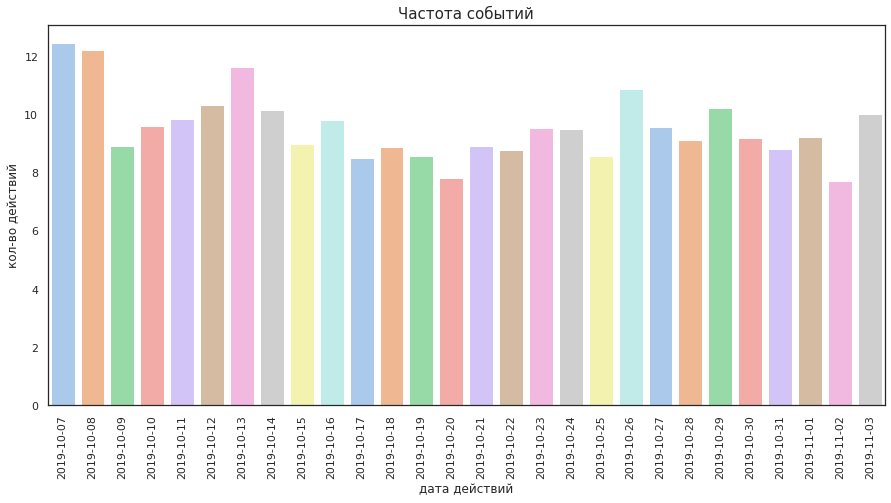

count    7817.000000
mean        9.491749
std        12.557971
min         1.000000
25%         3.000000
50%         6.000000
75%        11.000000
max       384.000000
Name: event_count, dtype: float64

In [35]:
plt.figure(figsize=(15, 7))
date=freq_event['event_date'].dt.date
sns.barplot(data=freq_event, x=date, y='event_count', palette='pastel', ci=None)
plt.title('Частота событий', fontsize = 15)
plt.ylabel('кол-во действий', fontsize = 12)
plt.xlabel('дата действий', fontsize = 12)
plt.xticks(rotation=90)
plt.show()
freq_event['event_count'].describe()

Проверим в какие дни были пиковые или мин значения

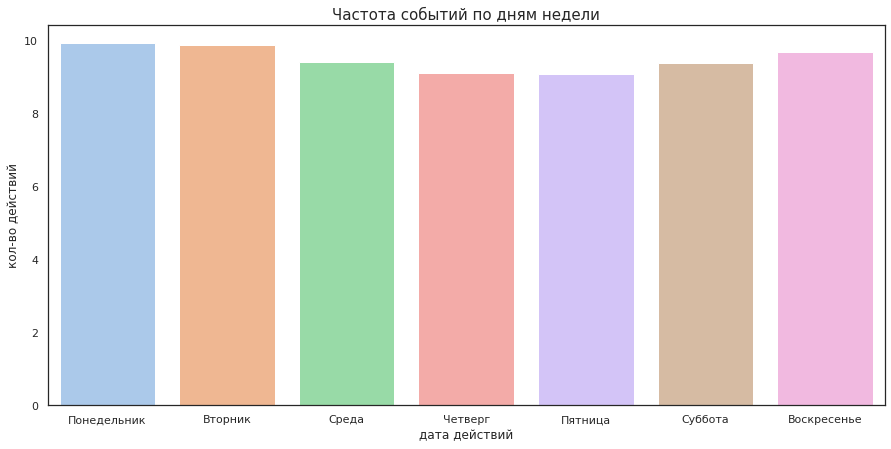

In [36]:
freq_event['weekday']=freq_event['event_date'].dt.day_name()
def day_week(x):
    if 'Sunday' in x:
        name = 'Воскресенье'
        return name
    elif 'Monday' in x:
        name = 'Понедельник'  
        return name
    elif 'Tuesday' in x:
        name = 'Вторник'
        return name
    elif 'Wednesday' in x:
        name = 'Среда'
        return name
    elif 'Thursday' in x:
        name = 'Четверг'
        return name
    elif 'Friday' in x:
        name = 'Пятница'
        return name
    elif 'Saturday' in x:
        name = 'Суббота'
        return name
    return x

freq_event['weekday'] = freq_event['weekday'].apply(day_week)
plt.figure(figsize=(15, 7))
date=freq_event['weekday']
sns.barplot(data=freq_event, x=date, y='event_count', palette='pastel', ci=None)
plt.title('Частота событий по дням недели', fontsize = 15)
plt.ylabel('кол-во действий', fontsize = 12)
plt.xlabel('дата действий', fontsize = 12)
plt.show()

В целом частота событий равномерна по дням недели, нет резких провалов. ЧТ и ПТ чуть меньше событий, в ВС,ПН, ВТ чуть больше.

В среднем на пользователя в день приходится 9 действий (включая автоматические, без них 5), минимально 1 действие, максимально 384 (220 без учета авто действий) действий. В начале периода 7 и 8 октября событий было больше чем в следующие дни.

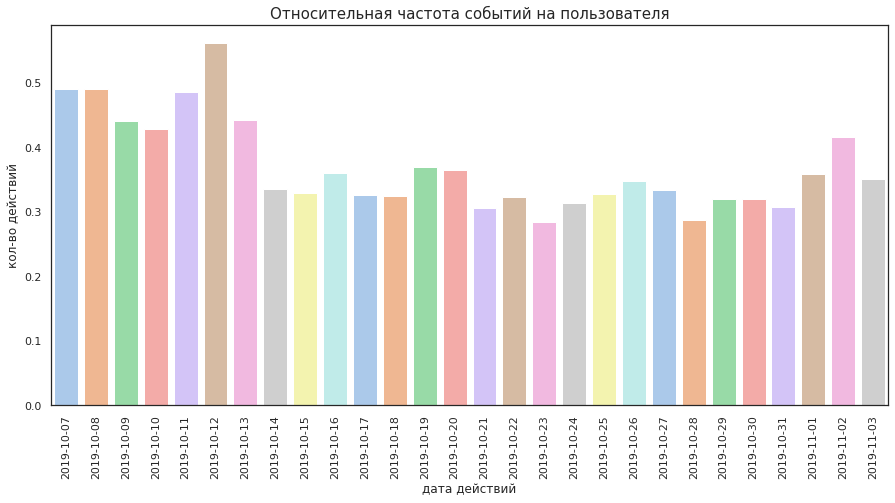

In [37]:
plt.figure(figsize=(15, 7))
date=freq_event['event_date'].dt.date
sns.barplot(data=freq_event, x=date, y='frequancy', palette='pastel', ci=None)
plt.title('Относительная частота событий на пользователя', fontsize = 15)
plt.ylabel('кол-во действий', fontsize = 12)
plt.xlabel('дата действий', fontsize = 12)
plt.xticks(rotation=90)
plt.show()

на одного пользователя приходится мене 0.6% всех событий в приложении. Странный всплеск 12 октября, при том что общая частота событий в этот день не выделялась.

Частота событий

In [38]:
freq_events = df['event_name'].value_counts().to_frame()
freq_events

,event_name
tips_show,40055
photos_show,10012
search,6784
advert_open,6164
contacts_show,4529
map,3881
favorites_add,1417
tips_click,814
contacts_call,541


Самое частое событие автоматическое, показ пользователю рекомендованных объявлений. Целевое событие просмотр контактов находится на 5 месте по частоте.

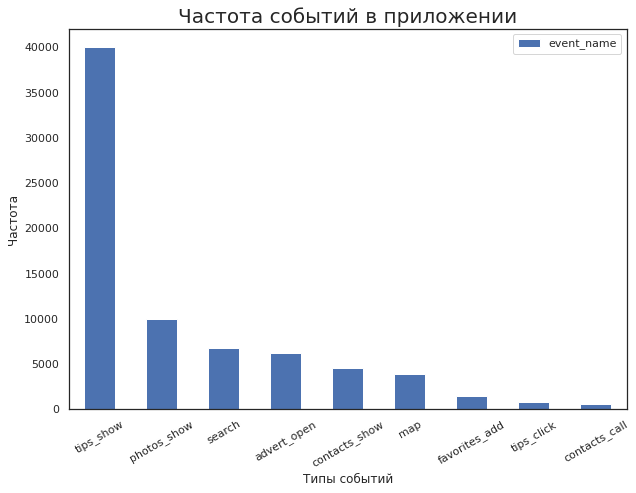

In [39]:
freq_events.plot(kind='bar', figsize=(10,7))
plt.title('Частота событий в приложении', fontsize=20)
plt.gca().set(xlabel='Типы событий', ylabel='Частота')
plt.xticks(rotation=30)
plt.show()

График также подтверждает, что мах число событий у автоматического события tips_show.

### Конверсия в целевое действие — просмотр контактов

Тут нам необходимо рачиать отношение числа целевых пользователей к общему числу пользователей приложения.
Сначала расчитаем сколько раз пользователь совершал целевое действие.
Для этого отфильтруем датасет по целевому действию, затем сгруппируем по пользоватлям.

In [40]:
conversion = df.query('event_name=="contacts_show"')
conversion=conversion.groupby('user_id', as_index=False).agg({'event_name':'count'}).rename(columns={'event_name':'conv'})

Нас интересует лишь факт целевого события, поэтому изменим значение столбца conv на 0 или 1

In [41]:
def to_bool(x):
    if x>0:
        name = 1
        return name
    return x
conversion['conv']=conversion['conv'].apply(to_bool)

Добавим флажок целевого действия в исходный датасет, пропуски в столбце заполним нулями.

In [42]:
df=df.merge(conversion, on='user_id', how='left')
df['conv']=df['conv'].fillna(0)

In [43]:
print('Общее число пользователей',len(df['user_id'].unique()))
goal_users=df.query('conv==1')
print('Общее число пользователей с целевым действием',len(goal_users['user_id'].unique()))
print('Конверсия=',round(len(goal_users['user_id'].unique())/len(df['user_id'].unique())*100,2),'%')

Общее число пользователей 4293
Общее число пользователей с целевым действием 981
Конверсия= 22.85 %


Конверсия 22.85%, есть над чем поработать для ее повышения.

<b>В этом разделе были проанализированы показатели:</b><br>
    - Retention Rate у пользователей первых двух недель анализа показатель выше чем у следующих. Было замечено снижение коэффициента при увеличении lifetime.<br>
    - Время, проведенное в приложении. Средняя продолжительность сессии 83 минуты.Большее число сессий не превышает 12 минут.<br> 
    - Частота событий в приложении, лидер tips_show, целевое событие на 5 месте.<br>
    - Конверсия в целевое действие составляет 22.85%<br>
    

## Сегментировать пользователей на основе действий

### Обоснование выбора сегментов

Для разделения пользователей на группы существет много разных методик.
Например ранее мы разбили на группы по недели регистрации, но такое разбиение нам мало что даст для продвижения к основной цели - улучшении показателей приложения.
Можно разделить на пользоватлей по периоду активности утро/день/вечер/ночь. Метод рабочий, но тоже весьма условный. Если утренние пользоватлеи покажут результат лучше днеынх не будем же мы их будить пушами и приглашать в приложение. Плюс будет погрешность за счет смешения временнх поясов, т.к. даже в рамках нашей страны существую большие разницы во времени между регионами.
Один из проверенных способов сегментации - по устройсву или по браузеру, например Android или Apple, но в исходных даных нет такой информации.
Поэтому воспользуемся методом деления на 3 группы по источнику трафика - Yandex/ Google/ прочие.
Этот метод по моему мнению выигрышен в том плане, мы можем рекламой влиять на размер групп. В итоге для маркетолога будет проще понять в какой канал проджвижения вкладывать средства, а вкладывать надо, т.к судя по данным, пользоватлей у приложения пока немного.

Выделим группы и проанализируем их размер

In [44]:
google_all=df.query('source =="google"').user_id.nunique()
yandex_all=df.query('source =="yandex"').user_id.nunique()
others_all=df.query('source =="other"').user_id.nunique()
print('Размер групп:google:',google_all,'yandex', yandex_all,'прочие',others_all, 'всего',google_all+yandex_all+others_all)
print('Всего пользоватлей в датасете:', df.user_id.nunique())

Размер групп:google: 1129 yandex 1934 прочие 1230 всего 4293
Всего пользоватлей в датасете: 4293


Размер груп получился достаточно равномерный, все пользователи датасета распределены. <br>Проведем анализ Retention Rate и конверсии по группам.

### Расчитаем Retention Rate по группам

Анализ уже ранее выполнялся выше, скопируем код для расчетов

#### Расчитаем Retention Rate по группе google

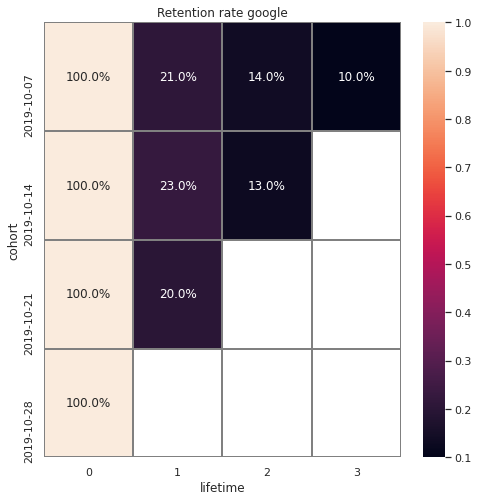

In [45]:
cohort_g = df.query('source =="google"').groupby(['cohort','lifetime']).agg({'user_id':'nunique'}).reset_index()
cohort_g= cohort_g.rename(columns={'user_id':'act_users'})
week0 = cohort_g[cohort_g['lifetime'] == 0][['cohort','act_users']]
week0 = week0.rename(columns={'act_users':'all_users'})
cohort_g = cohort_g.merge(week0,on='cohort')
cohort_g['retention'] = round(cohort_g['act_users']/cohort_g['all_users'],2)
cohort_g['cohort'] = cohort_g['cohort'].dt.date
#cohort_g
retention = cohort_g.pivot_table(index='cohort',columns='lifetime',values='retention',aggfunc='sum')
sns.set(style='white')
plt.figure(figsize=(8, 8))
plt.title('Retention rate google')
sns.heatmap(retention, annot=True, fmt='.1%', linewidths=1, linecolor='gray');
plt.show()

Мах показатель 23% для пользователей с 14 по 20 октября. Для пользователей 3ьей недели показатель ниже общего. С увеличением lifetime показатель падает

#### Расчитаем Retention Rate по группе yandex

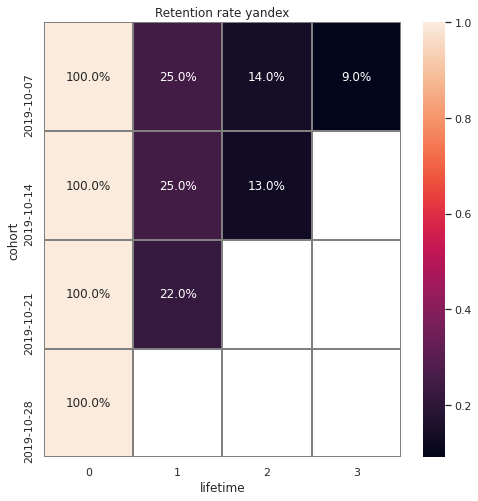

In [46]:
cohort_y = df.query('source =="yandex"').groupby(['cohort','lifetime']).agg({'user_id':'nunique'}).reset_index()
cohort_y= cohort_y.rename(columns={'user_id':'act_users'})
week0 = cohort_y[cohort_y['lifetime'] == 0][['cohort','act_users']]
week0 = week0.rename(columns={'act_users':'all_users'})
cohort_y = cohort_y.merge(week0,on='cohort')
cohort_y['retention'] = round(cohort_y['act_users']/cohort_y['all_users'],2)
cohort_y['cohort'] = cohort_y['cohort'].dt.date
retention = cohort_y.pivot_table(index='cohort',columns='lifetime',values='retention',aggfunc='sum')
sns.set(style='white')
plt.figure(figsize=(8, 8))
plt.title('Retention rate yandex')
sns.heatmap(retention, annot=True, fmt='.1%', linewidths=1, linecolor='gray');
plt.show()

Мах показатель 25% для пользователей двух недель с 7 по 20 октября. Для lifetime = одной неделе показатель выше обшего. С увеличением lifetime показатель падает

4.2.3  Расчитаем Retention Rate по группе others

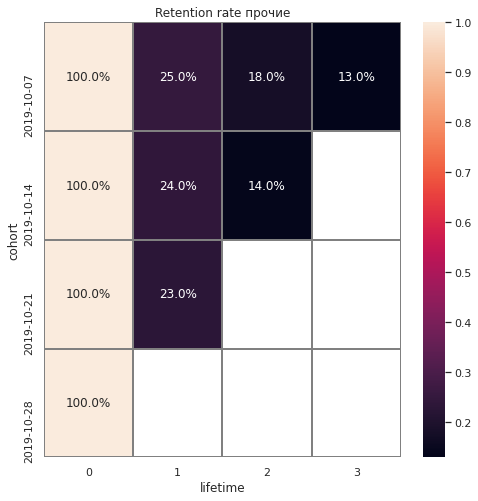

In [47]:
cohort_o = df.query('source =="other"').groupby(['cohort','lifetime']).agg({'user_id':'nunique'}).reset_index()
cohort_o= cohort_o.rename(columns={'user_id':'act_users'})
week0 = cohort_o[cohort_o['lifetime'] == 0][['cohort','act_users']]
week0 = week0.rename(columns={'act_users':'all_users'})
cohort_o = cohort_o.merge(week0,on='cohort')
cohort_o['retention'] = round(cohort_o['act_users']/cohort_o['all_users'],2)
cohort_o['cohort'] = cohort_o['cohort'].dt.date
retention = cohort_o.pivot_table(index='cohort',columns='lifetime',values='retention',aggfunc='sum')
sns.set(style='white')
plt.figure(figsize=(8, 8))
plt.title('Retention rate прочие')
sns.heatmap(retention, annot=True, fmt='.1%', linewidths=1, linecolor='gray');
plt.show()

Мах показатель 25% для пользователей с 7 по 13 октября. Для 3ьей недели показатель ниже общего. С увеличением lifetime показатель падает. Интересный факт, что при увеличении lifetime показатель падает меньше чем общий и чем у google и yandex. На 3ью неделю 13% против 9% yandex и 10% google.

В целом можно отметить, что при lifetime = одной неделе показатели лучше у yandex. При увеличении lifetime лидирует источник прочие.

### Рассчитаем конверсию по группам

In [48]:
google_goal=df.query('source =="google" and  conv==1').user_id.nunique()
google_cov=google_goal/google_all
yandex_goal=df.query('source =="yandex" and conv==1').user_id.nunique()
yandex_conv=yandex_goal/yandex_all
others_goal=df.query('source =="other" and conv==1').user_id.nunique()
others_conv=others_goal/others_all
print('Размер групп:google:',google_all,'yandex', yandex_all,'прочие',others_all)
print('Размер целевых групп:google:',google_goal,'yandex', yandex_goal,'прочие',others_goal)
print('Конверсия google',round(google_cov*100,2))
print('Конверсия yandex',round(yandex_conv*100,2))
print('Конверсия other',round(others_conv*100,2))

Размер групп:google: 1129 yandex 1934 прочие 1230
Размер целевых групп:google: 275 yandex 478 прочие 228
Конверсия google 24.36
Конверсия yandex 24.72
Конверсия other 18.54


В целом получился ожидаемый результат, конверсия у групп, пришедших с раскрученных поисковиков выше чем с других источников.
Мы анализируем данные за 19 год, тогда еще google не ушел из страны из-за санкций, поэтому маркетологам рекомендуем привлекать пользоватлей через каналы yandex и google. Далее с статичтическом тесте мы определим, что между групами google и yandex нет статистически значимых различий в конверсию, поэтому выбирать канал нужно будет с учетом анализа финансовых условий площадок по стоимости привлечения пользовталя.

## Проверим статистические гипотезы

### Некоторые пользователи установили приложение по ссылке из yandex, другие — из google. Проверить гипотезу: две эти группы демонстрируют разную конверсию в просмотры контактов.

Гипотезы:<br>
H0: статистически значимых различий между группами нет<br>
H1: статистически значимые различия между группами есть<br>

Посчитаем пользователей групп и целевых пользователей в группах

In [49]:
ya = df.query('source =="yandex" and event_name == "contacts_show"').user_id.nunique()
ya_all=df.query('source =="yandex"').user_id.nunique()
gg = df.query('source =="google" and event_name == "contacts_show"').user_id.nunique()
gg_all=df.query('source =="google"').user_id.nunique()

In [50]:
def test(first, second, all_f, all_s, al):  
    """ Функция для проверки гипотез
    
    first- первая группа
    second-вторая группа
    all_f -всего в первой группе
    all_s- всего во второй группе
    al - уровень стат. значимости альфа
    """
    alpha = al  # критический уровень статистической значимости
    p1 = first / all_f 
    p2 = second / all_s 
    p_combined = (first + second) / (all_f + all_s) 
    difference = p1 - p2 
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/all_f + 1/all_s))
    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1) 
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    if p_value < al:
        result='Отвергаем нулевую гипотезу'
    else:
        result='Не получилось отвергнуть нулевую гипотезу'
    return print('Группы',gr_1,'и',gr_2, ', alpha=',al,' p-value=',round(p_value,4), result)

In [51]:
gr_1 = 'google'
gg_conv=gg/gg_all
gr_2 = 'yandex'
ya_conv=ya/ya_all
print(f'Конверсия в contacts_show, с источника google: {round(gg_conv,2):.2%}')  
print(f'Конверсия в contacts_show, с источника yandex: {round(ya_conv,2):.2%}')
p_value_result=test(gg,ya,gg_all,ya_all,0.5)

Конверсия в contacts_show, с источника google: 24.00%
Конверсия в contacts_show, с источника yandex: 25.00%
Группы google и yandex , alpha= 0.5  p-value= 0.8244 Не получилось отвергнуть нулевую гипотезу


### Пользователи, просмотревшие фото и не просмотревшие демонстрируют разную конверсию в просмотры контактов. Проведем статистический тест.

Гипотезы:<br>
H0: статистически значимых различий между группами нет<br>
H1: статистически значимые различия между группами есть<br>

Добавим целевой признак photos_show в исходный датасет

In [52]:
photos = df.query('event_name=="photos_show"')
photos=photos.groupby('user_id', as_index=False).agg({'event_name':'count'}).rename(columns={'event_name':'photos_show'})
photos['photos_show']=photos['photos_show'].apply(to_bool)
df=df.merge(photos, on='user_id', how='left')
df['photos_show']=df['photos_show'].fillna(0)

In [53]:
users_by_photos = df.groupby('photos_show').agg({'user_id':'count'}).reset_index()

Посчитаем пользователей групп и целевых пользователей в группах

In [55]:
photos_show_all = df.query('photos_show == 1').user_id.nunique()
no_photos_show_all = df.query('photos_show == 0').user_id.nunique()
photos_show_conv = df.query('event_name=="contacts_show" and photos_show==1').user_id.nunique()
no_photos_show_conv = df.query('event_name=="contacts_show" and photos_show==0').user_id.nunique()

In [56]:
gr_1 = 'просмотрели фото'
gr1_conv=photos_show_conv/photos_show_all
gr_2 = 'не просмотрели фото'
gr2_conv=no_photos_show_conv/no_photos_show_all
print(f'Конверсия в contacts_show, пользователей смотревших фото: {round(gr1_conv,2):.2%}')  
print(f'Конверсия в contacts_show, пользователей не смотревших фото: {round(gr2_conv,2):.2%}')
p_value_result =test(photos_show_conv, no_photos_show_conv, photos_show_all, no_photos_show_all, 0.05)

Конверсия в contacts_show, пользователей смотревших фото: 31.00%
Конверсия в contacts_show, пользователей не смотревших фото: 20.00%
Группы просмотрели фото и не просмотрели фото , alpha= 0.05  p-value= 0.0 Отвергаем нулевую гипотезу


p-value получился ничтожно малым, поэтому при округлении он отображается нулями.

В данном разделе было проверены гипотезы:<br>
1.источник трафика вляет на целевое дестыие - статистически значимых различий между группами yandex и google нет, конверсия у групп почти одинакова.<br>
2.просмотр фото влияет на конверсию. Статистически значимые различия между группами есть, пользователи просматривающие фото, чаще просматривают контакты. Этот критерий можно использовать для увеличения конверсии,например рекомендовать пользоватлея размещать фото, т.к. без них объявление менее заметно и меньше просмотров контактов.

## Выводы и ответы на основные вопросы исследования

На прошлом месте работы мне довелось несколько лет руководить разработкой и внедренем подобного приложения для продажи товаров и услуг, поэтому часть выводов опирается на собственный опыт в продвижении.<br>
1. У приложения низкий коэффициент удержания пользователей, 10% на 3ью неделю использования. Возможно необходимо поработать над удобством интерфейса или проанализировать ошибки в приложении.<br>
2. Среднее время, проведенное в приложении чуть менее 12 минут - неплохой показатель, но при этом пользовтали мало пользуются поиском, возможно он не удобен.<br>
3. Наиболее частое действие в приложении автоматическое, tips_show (показа рекоментаций). 40055 раз, при этом целевое действие 4529 раз. Возникает вопрос, а правильно ли система предлагает пользователю рекомендации. Если просто показвать группу новых или премиум объявлений, толку будет мало. Имеет эффект показ рекомендации на основе прошлых поисков (интересов) пользователя.<br>
4. Поиск в приложении выделю в отдельный пункт. Суммарно пользоватлеи искользовали поиск 6784 раз. Показ рекомендаций 40055 раз. Клиенты мало пользуются поиском! Неудобный поиск был одной из ошибок при продвижении мной приложения, если пользователи не могли быстро найти то что им нужно, они уходили и уже не возвращались в приложение.<br> Проблему частично решила система  полнотекстового поиска Sphinx, которая ищет также на основе словоформ. Вторым действием по оптимизации, была рекомендация разместить бесплатно свое объявление на странице с нулевыми результатами поиска, таким образом заполнялась ниша товаров, которых нет в приложении и коэффициент удачных поисков превысил 80%. <br>
5. Показатель конверсии в целевое действие 22.85 % в целом слабый. Возможно виной плохо сделанный поиск по сайту или рекомендации без учета интересов.<br>
6. Был произведен анализ с разбивкой на источники трафика групп пользователей, он показал, что конверсия выше у пользователей Yandex и Google. При том что Retention Rate выше у Yandex чем у Google, маркетологам стоит обратить внимание на продвижение именно в этой поисковой системе. В данных непонятно что за 3й источник привлечения Other. Если это SEO канал, то его тоже нужно развивать.SEO оптимаизация обходится компании дешевле чем платное привлечение, поэтому даже при более низкой конверсии прочих каналов, нужно не забывать про SEO.<br>
7. Была проверена гипотеза о разности кноверсии у групп пользоватлей каналов Google и Yandex. Статистически значимой разницы между этими группами нет, поэтому в рамках исследования на 19 год можно также рекомендовать продвижение в канале Google, тут уже понадобится дополнительно исследование по стоимости првлечения пользователя.<br>
8. Была проверена гипотеза о разности конверсии у групп пользоватлей с просмотром фото и без. Эта гипотеза была выдвинута на основе собственного опыта. Объявления с фотографиями в разы повышают привлекательность товара и тем самым стимулируют на целевое действие. Можно в качестве рекомендации на странице размещения объявления сообщать эту информацию пользователю.<br>
9. При анализе были выявлены нулевые сессии. Разбивка на сессии была проведена условно в рамках дня, для более подобного анализа нужны данные о реальных сессиях, но наличие нулевых сессий может свидетельствовать о сбоях в прложении.<br>
10. В рамках данного исследования мы не затрагивали монетизацию, т.к. нет данных и не было задачи анализа. Возможно приложение еще молодое и для раскрутки монетизация выключена. Как один из инсайтов из собственного опыта - мощным инструментом повышения привлекательности приложения стала безопасная сделка. Покупатели охотнее идут на сделку, когда платформа гарантирует ему сохранность денег до получения товара, конверсия в целевое действие резко возрастает.

## Презентация

Ссылка на презентацию: https://disk.yandex.ru/i/FE7Bhmd3JtedmQ
Ссылка на дашборд:     https://clck.ru/33hMYY